In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import pickle

In [5]:
data_file = r'C:\Users\Barbara\Documents\Radboud uni\Internship\2p_data\Fiano\20230309\neural_data.pickle'
filehandler = open(data_file, 'rb')
neural_data = pickle.load(filehandler)
filehandler.close()

In [6]:
neural_data.keys()

dict_keys(['traces', 'footprints', 'df_f', 'deconvolved', 'positions', 'contour'])

In [7]:
tr = neural_data['traces']
spikes = neural_data['deconvolved']
positions = neural_data['positions']

In [14]:
#To compute clustering for traces

In [18]:
tr.shape

(288, 69733)

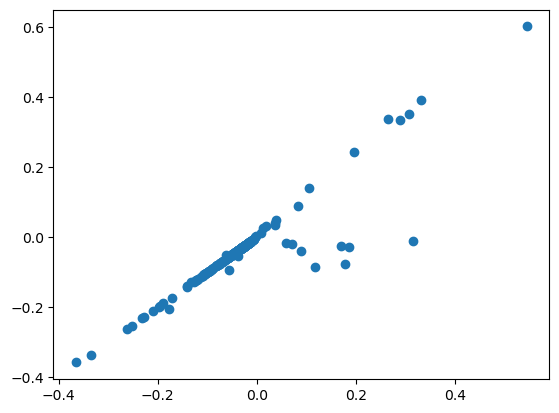

In [20]:
plt.scatter(tr[:,1],tr[:,0])

In [21]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

### DBSCAN clustering for spikes

C:\Users\Barbara\AppData\Local\Temp\ipykernel_8512\4091064421.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.eventplot(np.array(spikes)[ids])


Text(0, 0.5, 'Index of a neuron')

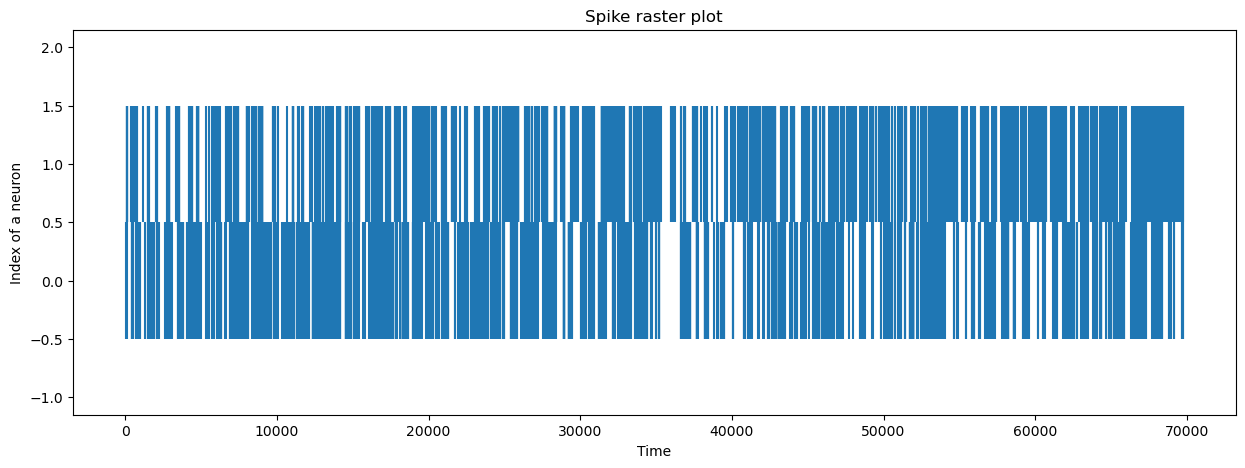

In [38]:
plt.figure(figsize=(15,5))
ids = [1,2]
plt.eventplot(np.array(spikes)[ids])

plt.title('Spike raster plot')
plt.xlabel('Time')
plt.ylabel('Index of a neuron')

In [24]:
# DBSCAN clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

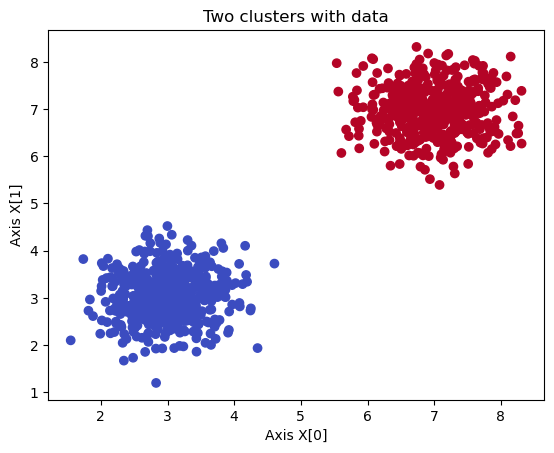

In [30]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [39]:
# DBSCAN clustering for spikes

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [48]:
epsilon = 1.0
min_samples = 10
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

C:\Users\Barbara\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


ValueError: operands could not be broadcast together with shapes (1623,) (1641,) 

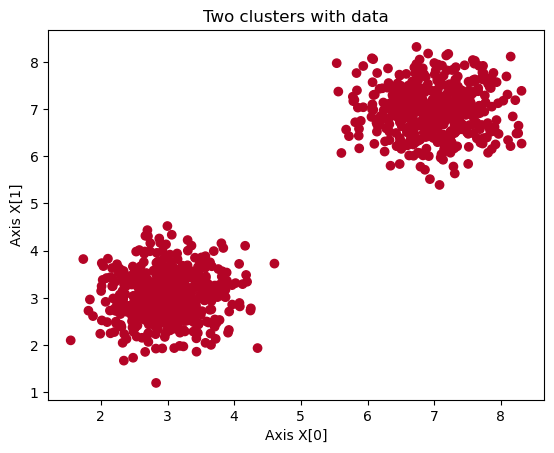

In [47]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

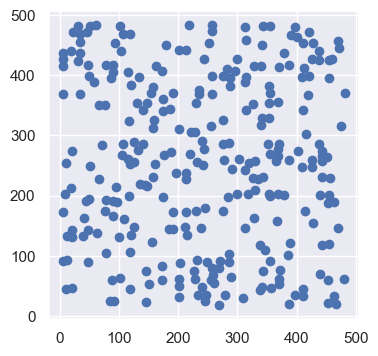

In [86]:
plt.figure(figsize=(4,4))
plt.scatter(positions[:,1],positions[:,0])

### K means

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [87]:
def initialize_centroids(positions, k):
    """returns k centroids from the initial positions"""
    centroids = positions.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [88]:
initialize_centroids(positions, 3)

array([[145.27463541, 190.99944319],
       [132.12039558,  12.46527176],
       [ 52.93099556, 151.44867006]])

TypeError: list indices must be integers or slices, not tuple

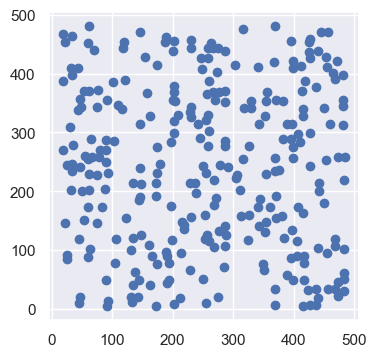

In [89]:
plt.figure(figsize=(4,4))
plt.scatter(positions[:, 0], positions[:, 1])
centroids = initialize_centroids([positions], 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [76]:
positions.shape

(288, 2)

### DBSCAN clustering #2

In [95]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 32


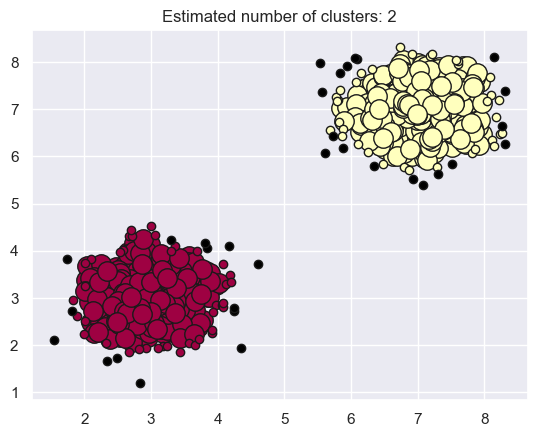

In [96]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
